In [1]:
import pandas as pd
import networkx as nx

from src.traffic.v3.environment import TrafficModel
from src.traffic.v3.util.network import build_network, create_cars, \
    create_sioux_falls_network, create_sioux_falls_cars

In [2]:
network_path = '/Users/tim/Documents/aamas-2024/src/traffic/v3/SiouxFalls/SiouxFalls_net.tntp'
costs_path = 'sf1_c.txt'
cars_path = 'sf1_dem.txt'

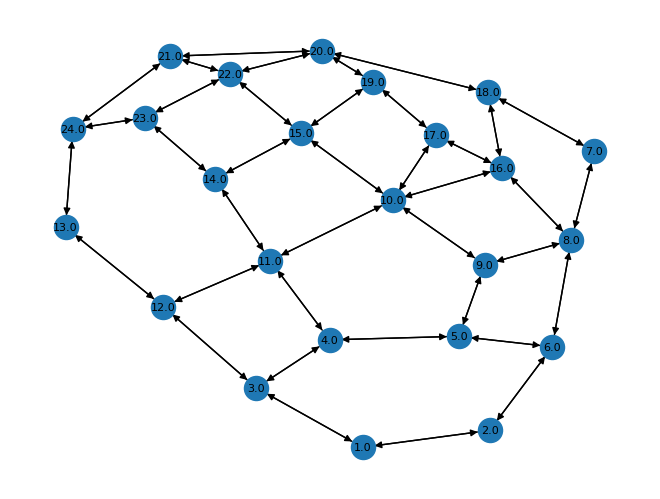

In [5]:
network = create_sioux_falls_network(network_path, costs_path)

nx.draw(network,
        with_labels=True,
        font_size=8,
        edgelist=[(v, w) for v, w in network.edges if v != w])

In [ ]:
cars = create_sioux_falls_cars(cars_path, network)
cars

In [8]:
number_of_steps = 1000

model = TrafficModel(network, cars)
step_stats_unrestricted, car_stats_unrestricted = model.run_sequentially(number_of_steps, show_progress=True)

100%|██████████| 1000/1000 [05:01<00:00,  3.32it/s]


In [ ]:
car_stats_unrestricted.groupby('step')['travel_time'].mean().rolling(window=100).mean().plot()

In [ ]:
car_stats_unrestricted.groupby(['source', 'target'])['travel_time'].mean()

In [ ]:
car_stats_unrestricted.groupby(['source', 'target'])['car_id'].count()